In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import fetch_california_housing



In [18]:
# Load and prepare the data 
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add target variable (house price)
df['Price'] =data.target
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# Split data into Train and test sets
# select features (independent variables) and target variable (dependent variable)
X = df[['MedInc', 'HouseAge', 'AveRooms', 'AveOccup']]
y= df['Price']

# Split the data (80% train, 20% test) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
Name: Price, dtype: float64

In [53]:
# Train a linear Regression model 
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [59]:
# Make Predication
y_pred = model.predict(X_test)


In [64]:
# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 0.60


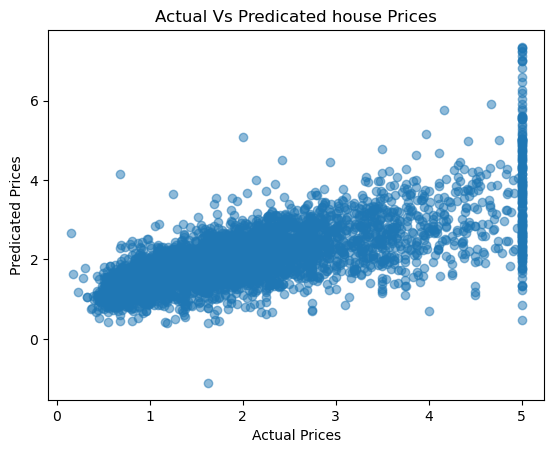

In [70]:
# Visualize Predication vs Actual
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel("Predicated Prices")
plt.title('Actual Vs Predicated house Prices')
plt.show()

In [89]:
# Observing different types of scalers in scikit learn 
# 1. StandardScaler 
from sklearn.preprocessing import StandardScaler
X = np.array([[1,2], [3,4], [5,6]])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)


[[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]


In [81]:
# 2. MinMaXscaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[0.  0. ]
 [0.5 0.5]
 [1.  1. ]]


In [84]:
# 3. RobustScaler (Scaling with Median nd IQR) 
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[-1. -1.]
 [ 0.  0.]
 [ 1.  1.]]


In [105]:
# Apply different scalers in fetch_california_housing
# Initialize scalers
standard_scaler = StandardScaler()
MinMax_scaler = MinMaxScaler()
Robust_Scaler = RobustScaler()

# Transform data using each scaler 
df_standard = pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns)
df_minmaX = pd.DataFrame(MinMax_scaler.fit_transform(df), columns=df.columns)
df_robust = pd.DataFrame(Robust_Scaler.fit_transform(df), columns=df.columns)

# print(f'StandardScaler: {df_standard}')
# print(f'MinMaxScaler: {df_minmaX}')
# print(f'RobustScaler: {df_robust}')

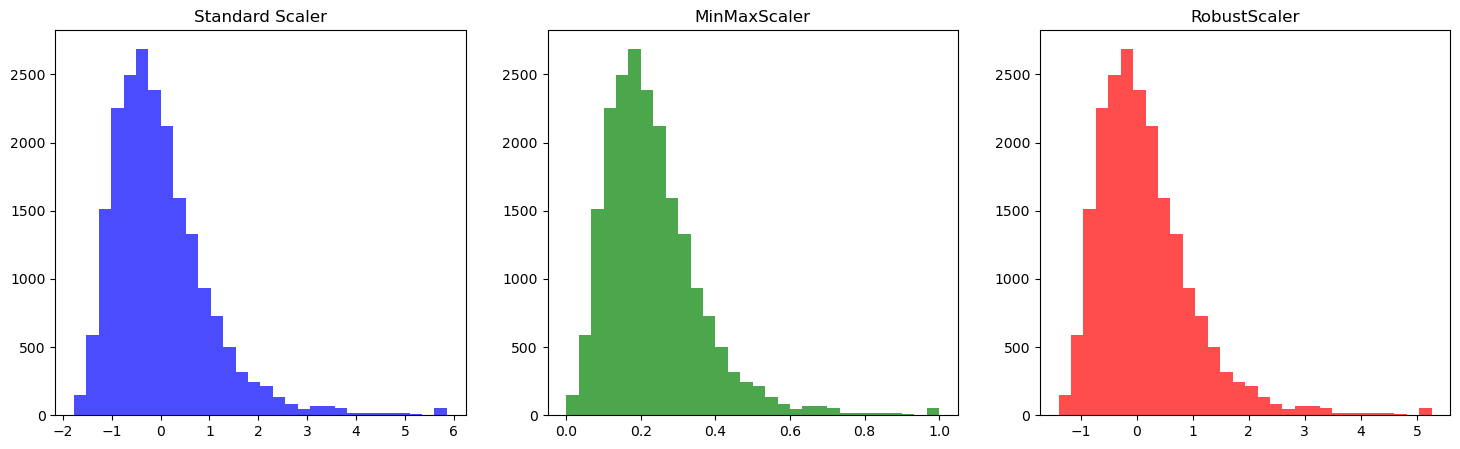

In [ ]:
# Visualizing scaling Effects
fig, axes = plt.subplots(1,3, figsize=(18, 5))

# Plot distributions for MedInc feature
axes[0].hist(df_standard['MedInc'], bins=30, alpha= 0.7, color='b')
axes[0].set_title('Standard Scaler')

axes[1].hist(df_minmaX['MedInc'], bins=30, alpha=0.7, color='g')
axes[1].set_title('MinMaxScaler')

axes[2].hist(df_robust['MedInc'], bins=30, alpha=0.7, color='r')
axes[2].set_title('RobustScaler')

plt.show()

In [109]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
